In [1]:
!pip install pandas numpy spacy nltk textblob vaderSentiment scikit-learn matplotlib seaborn
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
### Step 2: Import Necessary Libraries
import pandas as pd
import numpy as np
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

In [15]:
### Step 3: Load the Dataset
# Define a list to store articles
article_texts = []

# Define a list of file names
file_names = ['article_1.txt', 'article_2.txt']  # Add more file names here

# Load multiple text files
for file_name in file_names:
    with open(file_name, 'r', encoding='utf-8') as file:
        article_texts.append(file.read())

# Create a DataFrame
data = pd.DataFrame({"article_text": article_texts})

In [16]:
### Step 4: Text Preprocessing
# Download necessary NLTK data
import nltk # import the nltk library to use nltk.download
nltk.download('punkt_tab') # download the appropriate tokenizer model data
nltk.download('stopwords')

# Define a preprocessing function
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stop words
    return ' '.join(text)

# Apply preprocessing
data['cleaned_text'] = data['article_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
### Step 5: Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

# Define a function to extract entity counts
def extract_entities(text):
    doc = nlp(text)
    entities = {'ORG': 0, 'GPE': 0, 'PERSON': 0}
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_] += 1
    return entities

# Extract NER counts
data['entities'] = data['cleaned_text'].apply(extract_entities)
data['org_count'] = data['entities'].apply(lambda x: x['ORG'])
data['gpe_count'] = data['entities'].apply(lambda x: x['GPE'])
data['person_count'] = data['entities'].apply(lambda x: x['PERSON'])

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [18]:
### Step 6: Feature Engineering
# Calculate article length
data['article_length'] = data['cleaned_text'].apply(lambda x: len(x.split()))

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
data['sentiment'] = data['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Placeholder for engagement metrics
data['engagement_metrics'] = np.random.randint(1, 100, size=len(data))

# Combine features into a DataFrame
features = data[['org_count', 'gpe_count', 'person_count', 'article_length', 'sentiment', 'engagement_metrics']]


In [19]:
### Step 7: Train-Test Split
X = features.drop(columns=['engagement_metrics'])
y = features['engagement_metrics']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
### Step 8: Predictive Modeling
# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 46.0


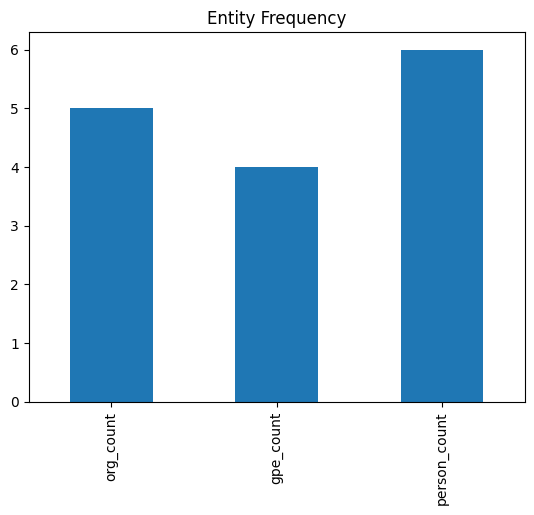

In [22]:

### Step 9: Visualization
# Bar chart for entity frequency
entity_counts = data[['org_count', 'gpe_count', 'person_count']].sum()
entity_counts.plot(kind='bar', title='Entity Frequency')
plt.show()


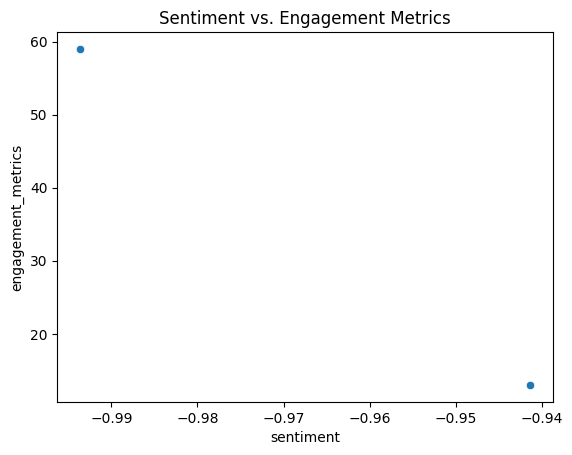

In [23]:
# Scatter plot for sentiment vs. engagement
sns.scatterplot(x=data['sentiment'], y=data['engagement_metrics'])
plt.title('Sentiment vs. Engagement Metrics')
plt.show()

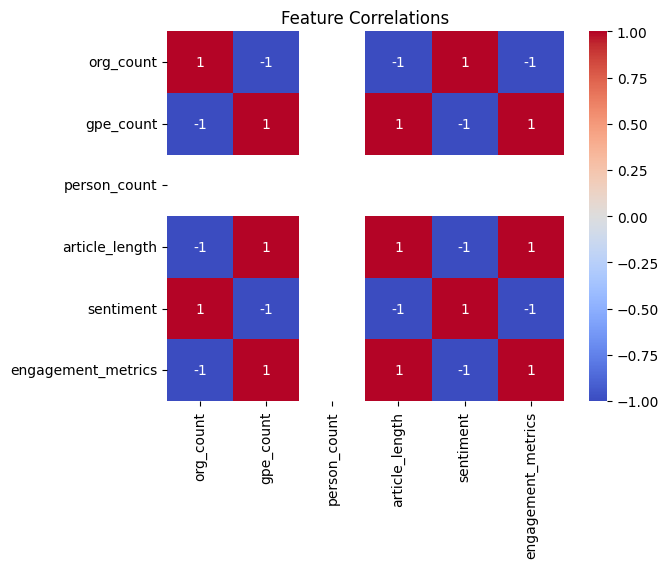

In [24]:
# Heatmap for feature correlations
sns.heatmap(features.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()